In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Ozkan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [8]:
poz=twitter_samples.strings('positive_tweets.json')
neg=poz=twitter_samples.strings('negative_tweets.json')

In [11]:
#Ekrana yazdıralım
print("Pozitif tweet sayısı:",len(poz))
print("Negatif tweet sayısı:",len(neg))
#Tipleri neler?
print("Pozitiflerin tipi :",type(poz))
print("Negatif girilen twittlerin tipi :",type(neg[0]))

Pozitif tweet sayısı: 5000
Negatif tweet sayısı: 5000
Pozitiflerin tipi : <class 'list'>
Girilen twittlerin tipi : <class 'str'>


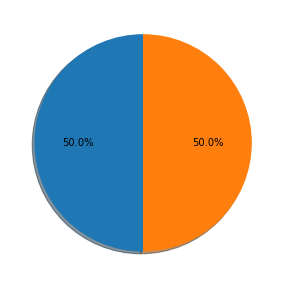

In [17]:
#ekrana çizdilerim
fig=plt.figure(figsize=(5,5))
etıket='Pozitif','Negatif'
boyut=[len(poz),len(neg)]
plt.pie(boyut, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [24]:
#1 tane poz 1 tane neg tweet' rastgele şeklinde gelse
print("Pozitif : " + poz[random.randint(0,500)])
print("Negatif : "  + neg[random.randint(0,500)])

Pozitif : u sound upset :( https://t.co/JZBFBKld8Q
Negatif : I don't think so :( #zayniscomingback


In [41]:
#Preprocess aşaması;
tweet=poz[1277]
print(tweet)

@LBHCRM hi beb :  ( i have a really bad migraine. sorry i wasn't on a lot today but i'm in a lot of pain : ( i'm gonna rest more. i love you


In [30]:
nltk.download('stopwords') #stopwords'leri indirelim;

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ozkan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
import re #regular expression
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
#gerekli kütüphaneler import etik


In [45]:
# '#' olsun 'http' olsun 'RT' gibi olan kelimeleri kaldırmak için ön hazırlk
print('Önceki hali : ' +tweet)
tweet2=re.sub(r'^RT[\s]+','',tweet)
twwet2=re.sub(r'https?:\/\/.*[\r\n]*', '' , tweet2)
tweet2=re.sub(r'#','',tweet2)
print(tweet2)

Önceki hali : @LBHCRM hi beb :  ( i have a really bad migraine. sorry i wasn't on a lot today but i'm in a lot of pain : ( i'm gonna rest more. i love you
@LBHCRM hi beb :  ( i have a really bad migraine. sorry i wasn't on a lot today but i'm in a lot of pain : ( i'm gonna rest more. i love you


In [50]:
#Kelimeleri bölmek
token=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_token=token.tokenize(tweet2)
print(tweet_token)
#Kelime kelime token etti her şeyi noktalama dahil ,

['hi', 'beb', ':', '(', 'i', 'have', 'a', 'really', 'bad', 'migraine', '.', 'sorry', 'i', "wasn't", 'on', 'a', 'lot', 'today', 'but', "i'm", 'in', 'a', 'lot', 'of', 'pain', ':', '(', "i'm", 'gonna', 'rest', 'more', '.', 'i', 'love', 'you']


In [52]:
#stopwordleri ele alalım
stopwords_english=stopwords.words('english')
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
temiz=[]
for word in tweet_token:
    if(word not in stopwords_english and
      word not in string.punctuation):
        temiz.append(word)

print(temiz)        
#kelimeler eksildi.

['hi', 'beb', 'really', 'bad', 'migraine', 'sorry', 'lot', 'today', "i'm", 'lot', 'pain', "i'm", 'gonna', 'rest', 'love']


In [55]:
#Stemming aşaması aynı kelimelere eklenen ekler gibi düşün
stem=PorterStemmer()
tweet_stem=[]
for word in temiz:
    stem_word=stem.stem(word) #stemming word
    tweet_stem.append(stem_word) #append to the list
    
print(tweet_stem)

#örnek realli almış migrain almış sondaki kelimeleri atmış oluyor örnekte açıklandığı gibi

['hi', 'beb', 'realli', 'bad', 'migrain', 'sorri', 'lot', 'today', "i'm", 'lot', 'pain', "i'm", 'gonna', 'rest', 'love']
